<a href="https://colab.research.google.com/github/Zh0ny/desafio_de_projeto_calculo_de_metricas_de_avaliacao_de_aprendizado/blob/main/metrics_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q tensorflow

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models, Input
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [11]:
tf.__version__

'2.18.0'

In [12]:
%load_ext tensorboard

In [13]:
logdir='log'

In [14]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [18]:
model = models.Sequential([
    Input(shape=(28, 28, 1)),  # Camada Input explícita
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.8974 - loss: 0.3271 - val_accuracy: 0.9870 - val_loss: 0.0399
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 38ms/step - accuracy: 0.9853 - loss: 0.0478 - val_accuracy: 0.9870 - val_loss: 0.0397
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 31ms/step - accuracy: 0.9908 - loss: 0.0319 - val_accuracy: 0.9893 - val_loss: 0.0345
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.9897 - val_loss: 0.0315
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9945 - loss: 0.0188 - val_accuracy: 0.9910 - val_loss: 0.0311


In [28]:
y_true = test_labels
y_pred = model.predict(test_images)
y_pred_argmax = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [21]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

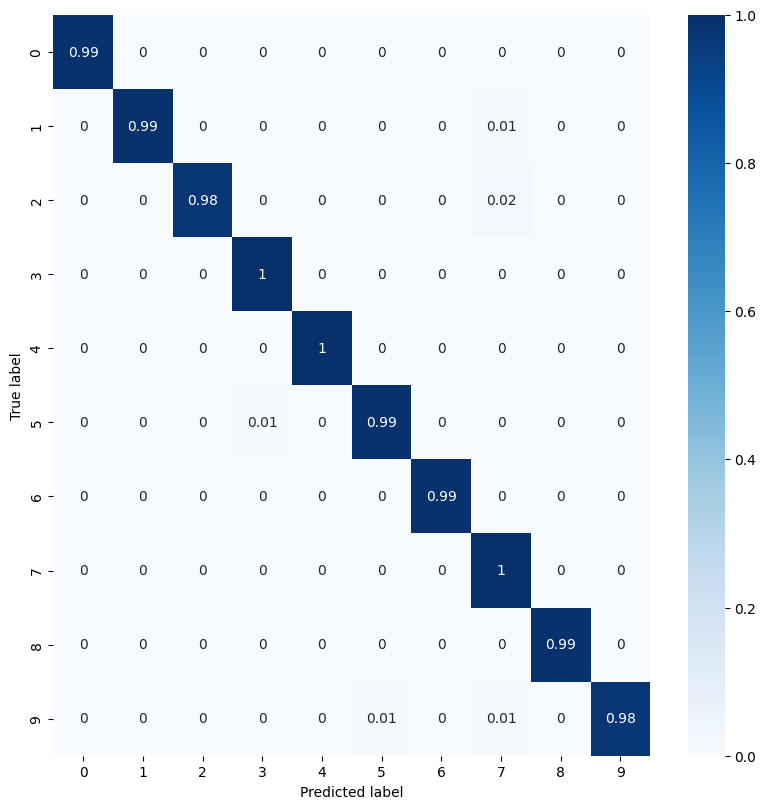

In [29]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_argmax).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
num_classes = con_mat_df.shape[0]
VP_array = np.zeros(num_classes)
FN_array = np.zeros(num_classes)
FP_array = np.zeros(num_classes)
VN_array = np.zeros(num_classes)

for i in range(num_classes):
    VP = con_mat_df.iloc[i, i]
    FN = np.sum(con_mat_df.iloc[i, :]) - VP
    FP = np.sum(con_mat_df.iloc[:, i]) - VP
    VN = np.sum(con_mat_df.values) - VP - FN - FP

    # Armazena os valores nos arrays
    VP_array[i] = VP
    FN_array[i] = FN
    FP_array[i] = FP
    VN_array[i] = VN

In [33]:
sensibilidade = np.zeros(num_classes)
especificidade = np.zeros(num_classes)
acuracia = 0
precisao = np.zeros(num_classes)
f_score = np.zeros(num_classes)

In [41]:
for i in range(num_classes):
    sensibilidade[i] = VP_array[i] / (VP_array[i] + FN_array[i])
    print(f"Sensibilidade da classe {i} : {sensibilidade[i]}")
for i in range(num_classes):
    especificidade[i] = VN_array[i] / (VN_array[i] + FP_array[i])
    print(f"Especificidade da classe {i} : {especificidade[i]}")
for i in range(num_classes):
    precisao[i] = VP_array[i] / (VP_array[i] + FP_array[i])
    print(f"Precisão da classe {i} : {precisao[i]}")
for i in range(num_classes):
    f_score[i] = 2 * (precisao[i] * sensibilidade[i]) / (precisao[i] + sensibilidade[i])
    print(f"F-Score da classe {i} : {f_score[i]}")
acuracia = (np.sum(VP_array) + np.sum(VN_array)) / (np.sum(VP_array) + np.sum(FN_array) + np.sum(FP_array) + np.sum(VN_array))
print(f"Acurácia: {acuracia}")

Sensibilidade da classe 0 : 1.0
Sensibilidade da classe 1 : 0.99
Sensibilidade da classe 2 : 0.98
Sensibilidade da classe 3 : 1.0
Sensibilidade da classe 4 : 1.0
Sensibilidade da classe 5 : 0.99
Sensibilidade da classe 6 : 1.0
Sensibilidade da classe 7 : 1.0
Sensibilidade da classe 8 : 1.0
Sensibilidade da classe 9 : 0.98
Especificidade da classe 0 : 1.0
Especificidade da classe 1 : 1.0
Especificidade da classe 2 : 1.0
Especificidade da classe 3 : 0.9988851727982163
Especificidade da classe 4 : 1.0
Especificidade da classe 5 : 0.9988851727982163
Especificidade da classe 6 : 1.0
Especificidade da classe 7 : 0.9955406911928651
Especificidade da classe 8 : 1.0
Especificidade da classe 9 : 1.0
Precisão da classe 0 : 1.0
Precisão da classe 1 : 1.0
Precisão da classe 2 : 1.0
Precisão da classe 3 : 0.9900990099009901
Precisão da classe 4 : 1.0
Precisão da classe 5 : 0.99
Precisão da classe 6 : 1.0
Precisão da classe 7 : 0.9615384615384615
Precisão da classe 8 : 1.0
Precisão da classe 9 : 1.0


In [39]:
# Cálculos Macro
precisao_macro = np.mean(precisao)
sensibilidade_macro = np.mean(sensibilidade)
especificidade_macro = np.mean(especificidade)
f_score_macro = np.mean(f_score)

# Cálculos Micro
precisao_micro = np.sum(VP_array) / (np.sum(VP_array) + np.sum(FP_array))
sensibilidade_micro = np.sum(VP_array) / (np.sum(VP_array) + np.sum(FN_array))
especificidade_micro = np.sum(VN_array) / (np.sum(VN_array) + np.sum(FP_array))
precisao_micro = np.sum(VP_array) / (np.sum(VP_array) + np.sum(FP_array))
f_score_micro = 2 * (precisao_micro * sensibilidade_micro) / (precisao_micro + sensibilidade_micro)

# Exibição dos Resultados Macro e Micro
print(f"Precisão Macro: {precisao_macro}")
print(f"Precisão Micro: {precisao_micro}")
print(f"Sensibilidade Macro: {sensibilidade_macro}")
print(f"Sensibilidade Micro: {sensibilidade_micro}")
print(f"Especificidade Macro: {especificidade_macro}")
print(f"Especificidade Micro: {especificidade_micro}")
print(f"Precisão Macro: {precisao_macro}")
print(f"Precisão Micro: {precisao_micro}")
print(f"F-Score Macro: {f_score_macro}")
print(f"F-Score Micro: {f_score_micro}")


Precisão Macro: 0.9941637471439451
Precisão Micro: 0.9939819458375125
Sensibilidade Macro: 0.9940000000000001
Sensibilidade Micro: 0.9939819458375125
Especificidade Macro: 0.9993311036789297
Especificidade Micro: 0.9993313273152792
Precisão Macro: 0.9941637471439451
Precisão Micro: 0.9939819458375125
F-Score Macro: 0.9940189886654475
F-Score Micro: 0.9939819458375125
